## ROC Plot for MY-BENCHMARK: HMMER vs MMseqs vs MMOREseqs

## MY-BENCHMARK Dataset

In [1]:
### Imports ###
from __future__ import print_function
import sys
import os
import psutil
import math
import numpy as np
import pandas as pd
import cv2 as cv
from PIL import Image
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm
import statistics as stats

In [2]:
### MatPlotLib settings ###

# number or rows/columns to display
pd.options.display.max_rows = 40
pd.options.display.max_columns = 20

# resolution of output
matplotlib.rcParams['figure.dpi'] = 300

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 6 }

matplotlib.rc('font', **font)

database = "my-benchmark"
version = "002"
# params = "12.16.5."
params = ""

In [3]:
### Root Directory ###
path_to_db = "data/{}/".format("")

In [4]:
### Index Filepaths ###
target_index_fname = "{}/target.idx".format(path_to_db)
query_index_fname = "{}/query.idx".format(path_to_db)

In [5]:
### Filepaths ###
mm_s2s_fname    = "{}/mm_s2s.tf".format(path_to_db)
mm_p2s_fname    = "{}/mm_p2s.tf".format(path_to_db)

In [6]:
### Counts ###
# Total Queries and Targets
total_target       =   2017088
total_query        =      3003
total_target_real  =     17088 
total_target_decoy =   2000000
# Total True Positives and Negatives
total_res = 6057315264
total_TP  =      17088
total_TN  = 6006000000
unknown   =   51298176
TP_to_TN  =   2.85e-06

# load data

In [7]:
datas = []

# set header format
tf_dformat = {
    "target_name": "str",
    "query_name": "str",
    "eval": "float",
    "truth": "str",
    "tot_T": "int",
    "tot_F": "int",
    "tot_?": "int"
}
tf_header = tf_dformat.keys()

# load data
usecols = [0,1,2,3,4,5]
skiprows = None
sep = " "
names = tf_header

In [8]:
mm_s2s_data = pd.read_csv( mm_s2s_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mm_s2s_data)
mm_s2s_data

FileNotFoundError: [Errno 2] No such file or directory: 'data///mm_s2s.tf'

In [46]:
mm_p2s_data = pd.read_csv( mm_p2s_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mm_p2s_data)
mm_p2s_data

,target_name,query_name,eval,truth,tot_T,tot_F
0,PF00939.20,CitMHS/2900/17-535/637-1021,1.412000e-117,?,0,0
1,PF13688.7,Reprolysin_4/13452/184-396/404-627,1.141000e-101,?,0,0
2,PF04762.13,IKI3/8698/202-1154/1211-2174,2.152000e-93,?,0,0
3,PF13688.7,Reprolysin_2/13445/4-210/230-427,6.613000e-93,?,0,0
4,PF14905.7,TonB_dep_Rec/15837/54-548/678-1166,1.056000e-72,?,0,0
...,...,...,...,...,...,...
4047,PF01732.17,DUF31/4450/47-429/560-977,9.834000e-04,?,0,0
4048,PF00100.24,Zona_pellucida/17072/349-590/731-995,9.859000e-04,?,0,0
4049,PF09848.10,DUF2075/4169/31-422/450-810,9.888000e-04,?,0,0
4050,PF19020.1,Ta1207/15106/13-291/304-558,9.911000e-04,?,0,0


In [47]:
for data in datas:
    data["roc_y"] = data["tot_T"] / total_TP
    data["roc_x"] = data["tot_F"] / total_query

In [48]:
data

,target_name,query_name,eval,truth,tot_T,tot_F,roc_y,roc_x
0,PF00939.20,CitMHS/2900/17-535/637-1021,1.412000e-117,?,0,0,0.0,0.0
1,PF13688.7,Reprolysin_4/13452/184-396/404-627,1.141000e-101,?,0,0,0.0,0.0
2,PF04762.13,IKI3/8698/202-1154/1211-2174,2.152000e-93,?,0,0,0.0,0.0
3,PF13688.7,Reprolysin_2/13445/4-210/230-427,6.613000e-93,?,0,0,0.0,0.0
4,PF14905.7,TonB_dep_Rec/15837/54-548/678-1166,1.056000e-72,?,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
4047,PF01732.17,DUF31/4450/47-429/560-977,9.834000e-04,?,0,0,0.0,0.0
4048,PF00100.24,Zona_pellucida/17072/349-590/731-995,9.859000e-04,?,0,0,0.0,0.0
4049,PF09848.10,DUF2075/4169/31-422/450-810,9.888000e-04,?,0,0,0.0,0.0
4050,PF19020.1,Ta1207/15106/13-291/304-558,9.911000e-04,?,0,0,0.0,0.0


/home/devreckas/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


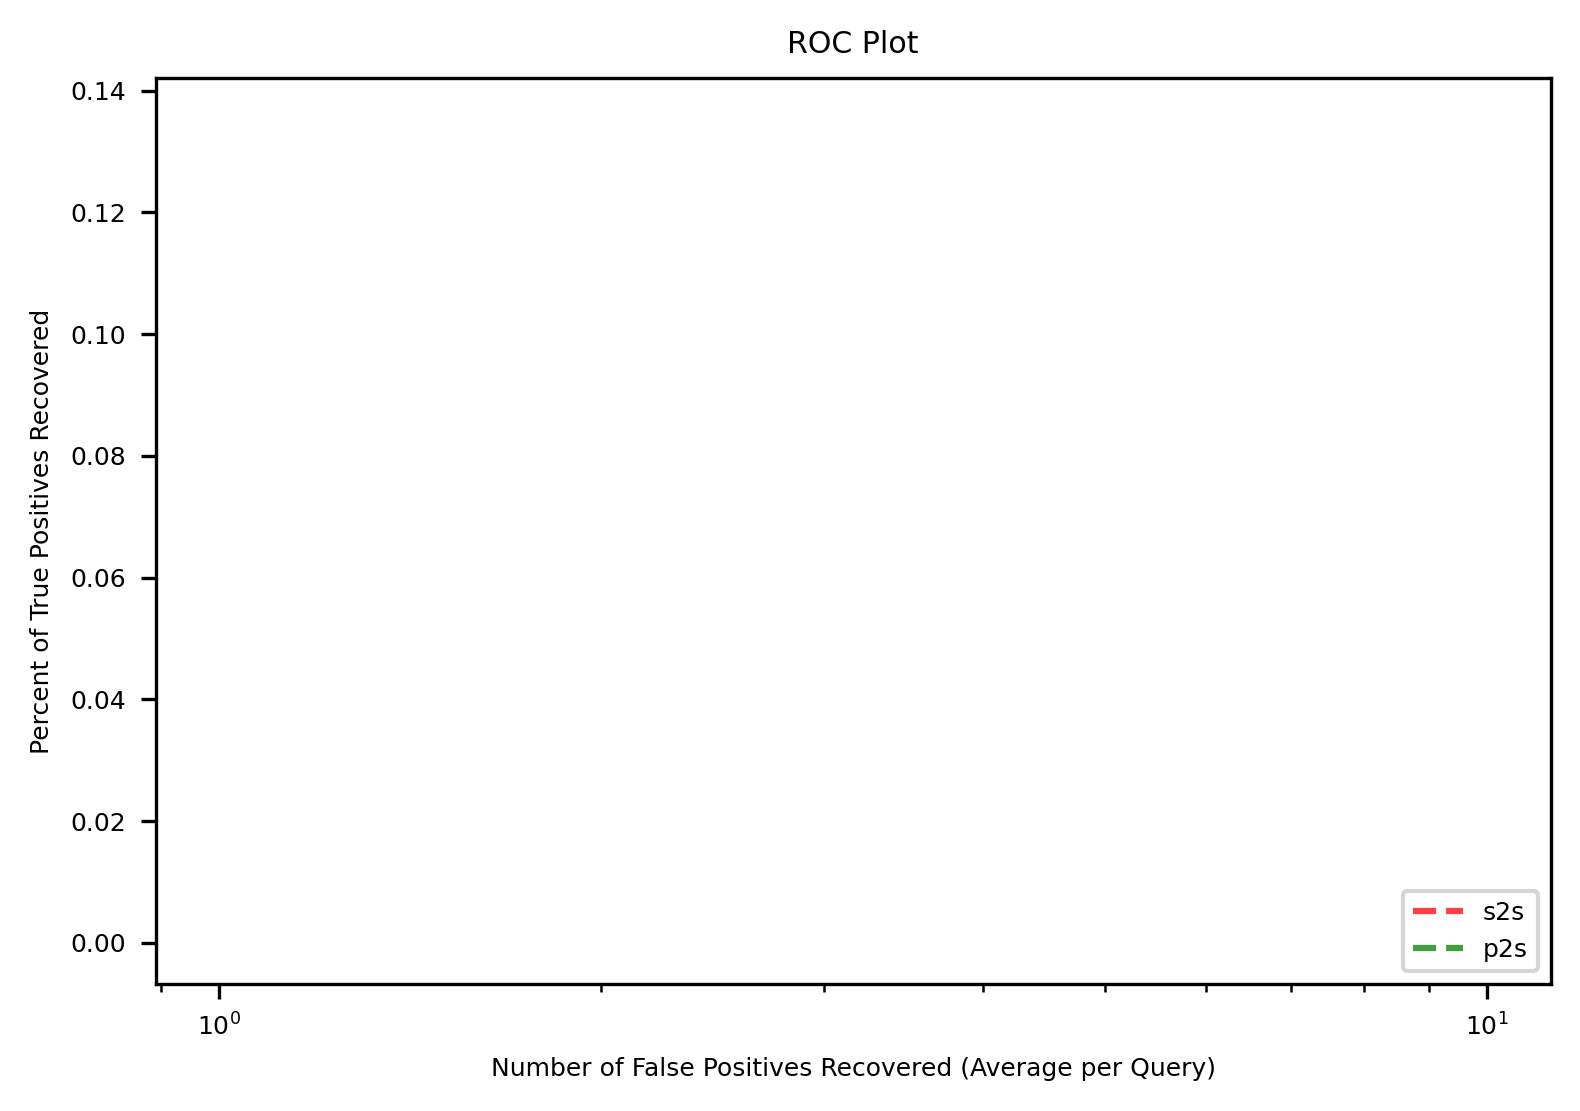

In [51]:
my_data = [ mm_s2s_data, mm_p2s_data ]
colors  = [ 'red', 'green' ]
labels  = [ 's2s', 'p2s' ]
linewidths = [ 1.5, 1.5 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None, linewidth=linewidths[x], alpha=0.75 )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

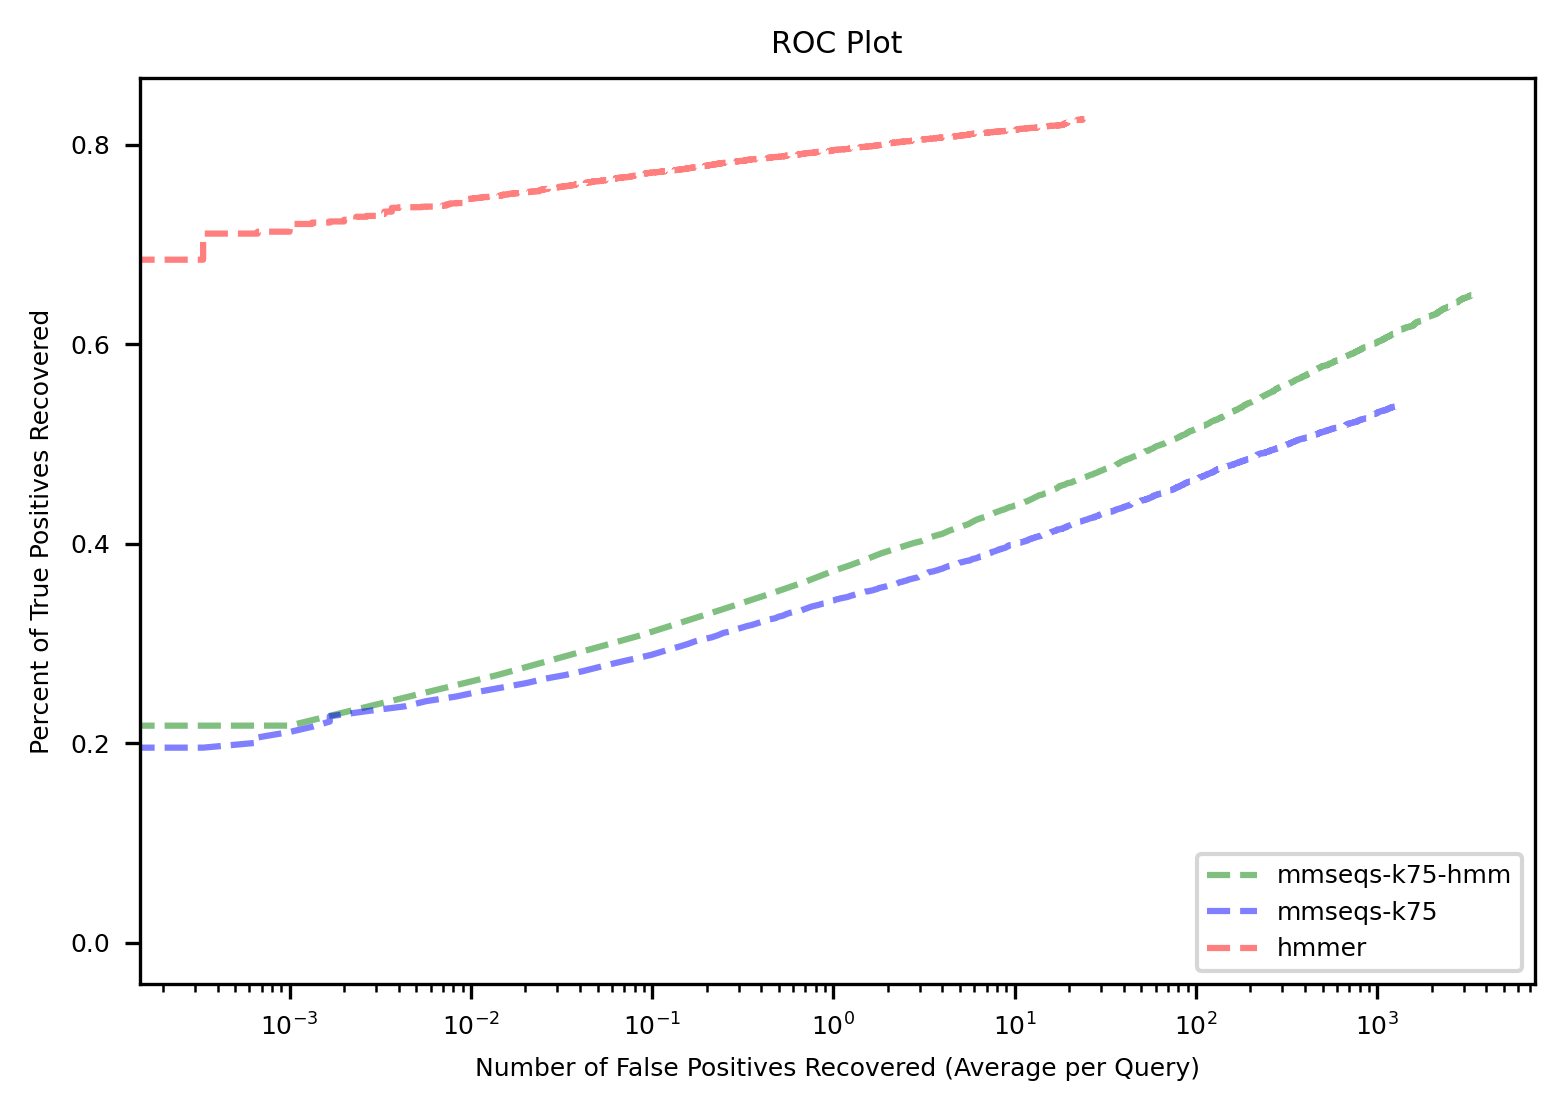

In [120]:
my_data = [ mmseqs_k75_hmm_data, mmseqs_k75_data, hmmer_data ]
colors  = [ 'green', 'blue', 'red' ]
labels  = [ 'mmseqs-k75-hmm', 'mmseqs-k75', 'hmmer' ]
linewidths = [ 1.5, 1.5, 1.5 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None, linewidth=linewidths[x], alpha=0.5 )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

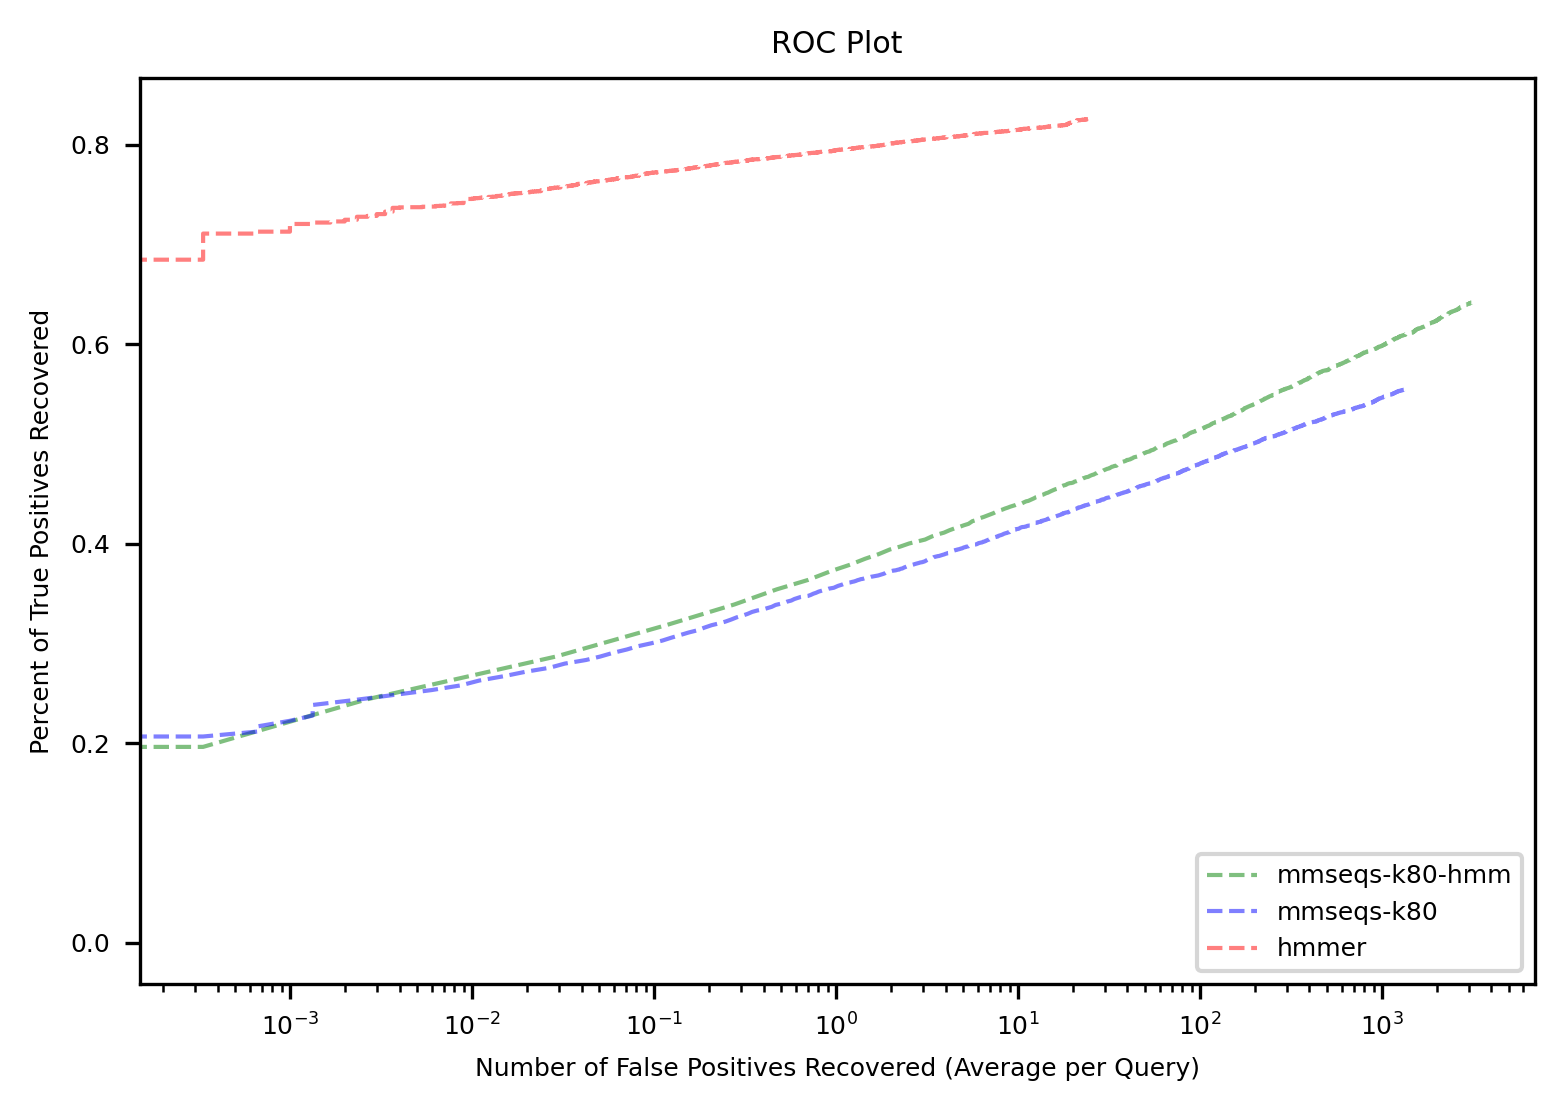

In [111]:
my_data = [ mmseqs_k80_hmm_data, mmseqs_k80_data, hmmer_data ]
colors  = [ 'green', 'blue', 'red' ]
labels  = [ 'mmseqs-k80-hmm', 'mmseqs-k80', 'hmmer' ]
linewidths = [ 1, 1, 1 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None, linewidth=linewidths[x], alpha=0.5 )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

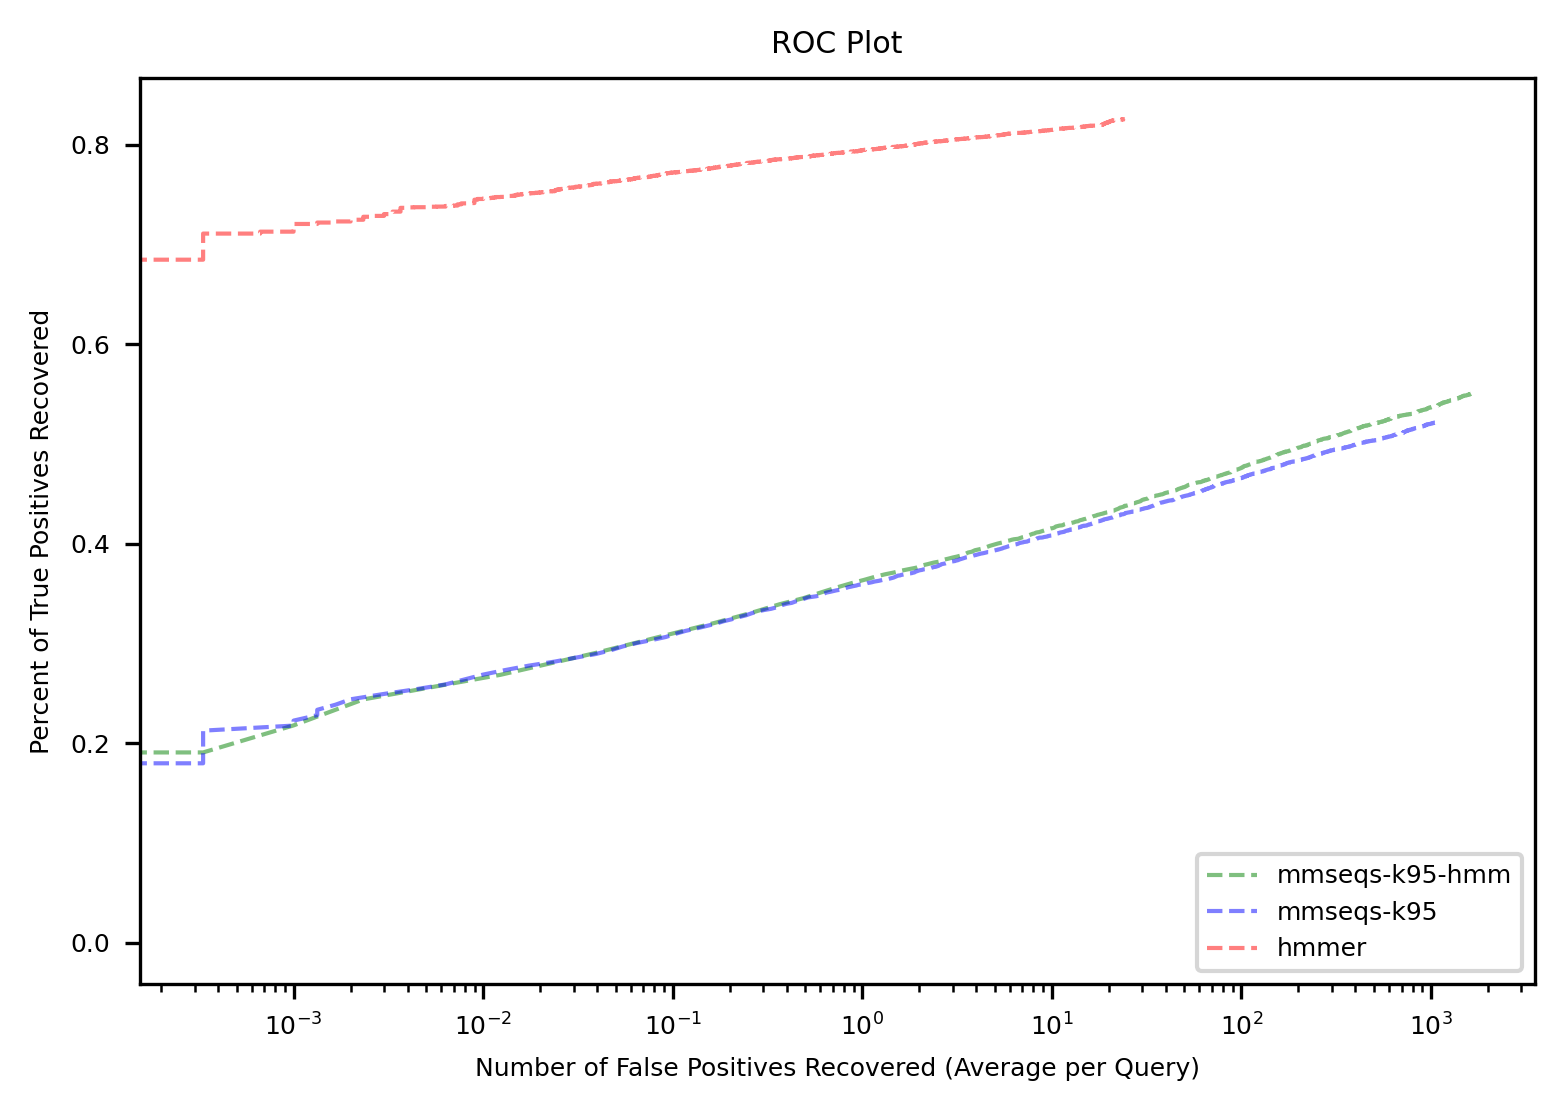

In [113]:
my_data = [ mmseqs_k95_hmm_data, mmseqs_k95_data, hmmer_data ]
colors  = [ 'green', 'blue', 'red' ]
labels  = [ 'mmseqs-k95-hmm', 'mmseqs-k95', 'hmmer' ]
linewidths = [ 1, 1, 1 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None, linewidth=linewidths[x], alpha=0.5 )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

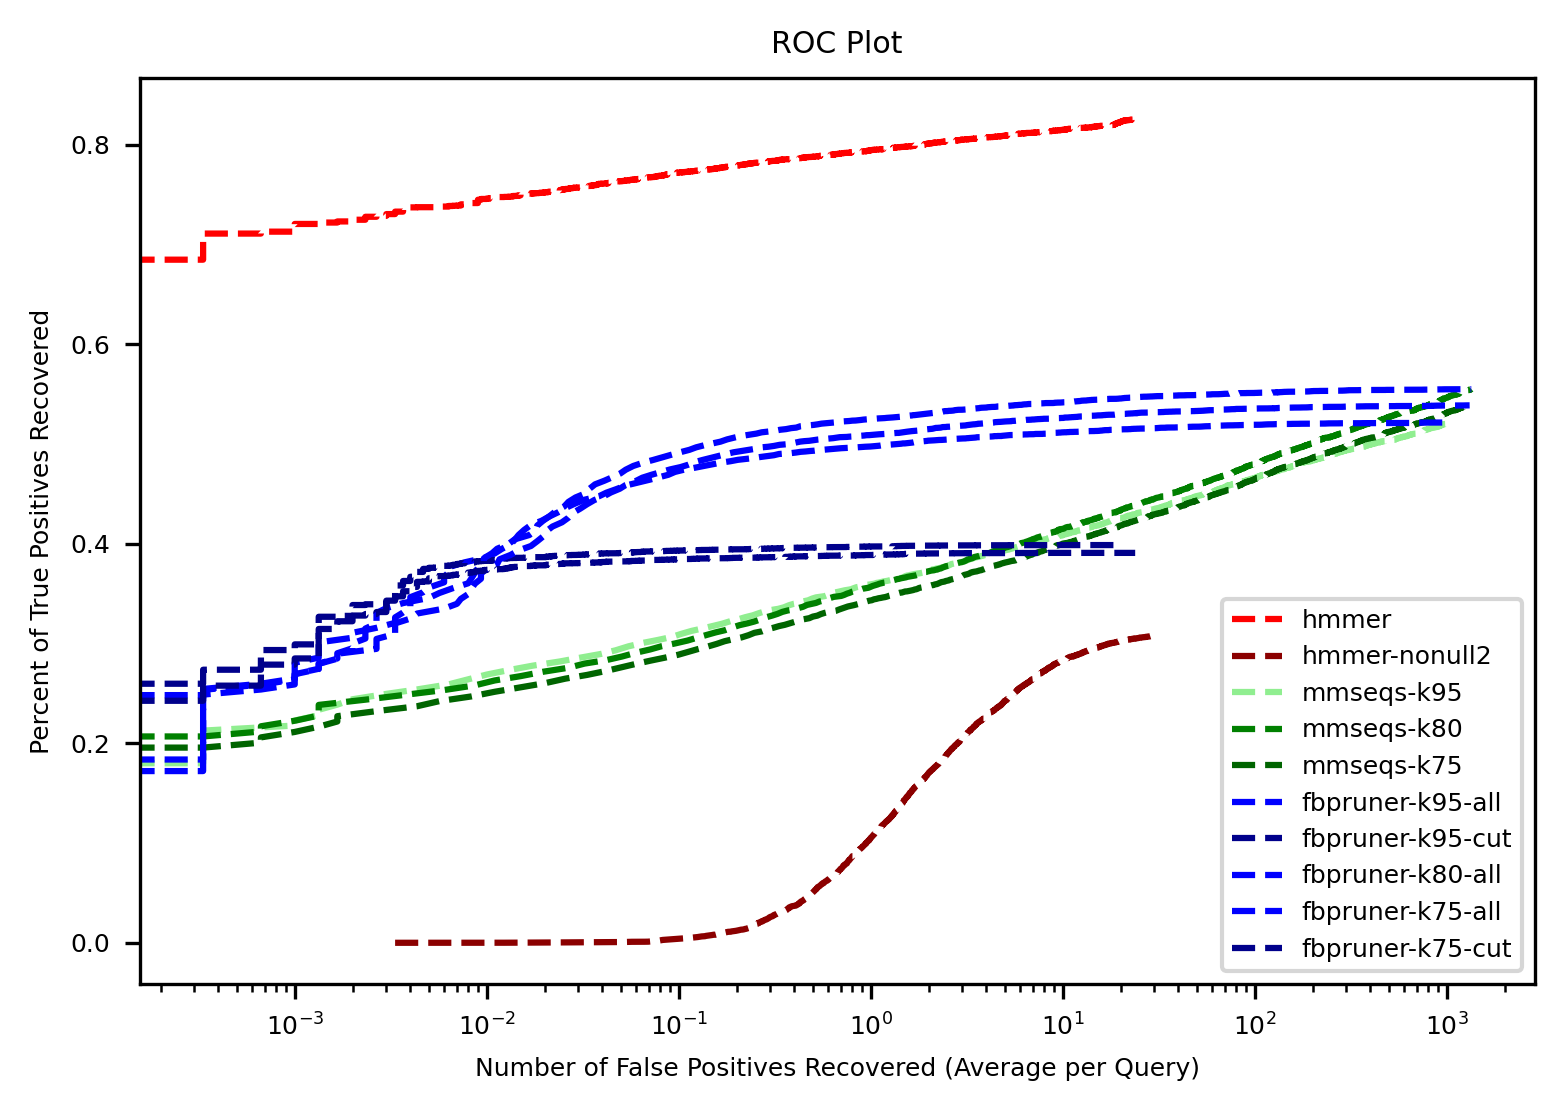

In [81]:
my_data = [ hmmer_data, hmmer_nonull_data, mmseqs_k95_data, mmseqs_k80_data, mmseqs_k75_data,  fbpruner_k95_all_data, fbpruner_k95_cut_data, fbpruner_k80_all_data, fbpruner_k75_all_data, fbpruner_k75_cut_data ]
colors  = [ 'red', 'darkred', 'lightgreen', 'green', 'darkgreen', 'blue', 'darkblue', 'blue', 'blue', 'darkblue' ]
labels  = [ 'hmmer', 'hmmer-nonull2', 'mmseqs-k95', 'mmseqs-k80', 'mmseqs-k75', 'fbpruner-k95-all', 'fbpruner-k95-cut', 'fbpruner-k80-all', 'fbpruner-k75-all', 'fbpruner-k75-cut' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

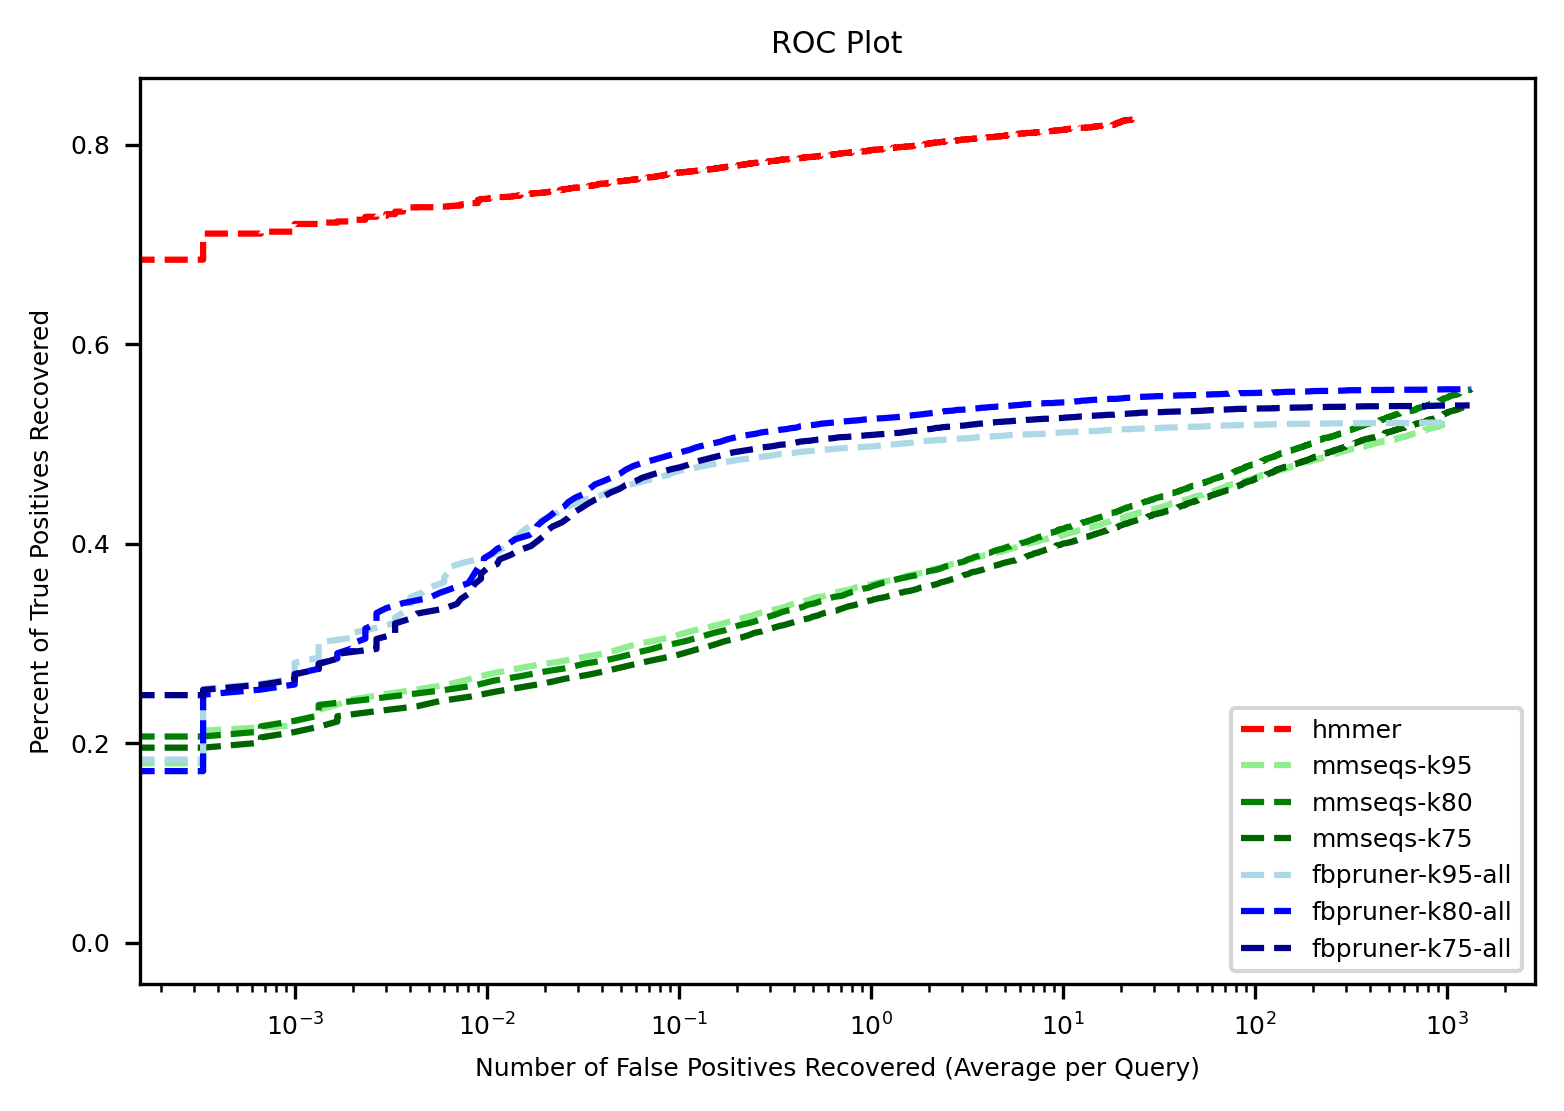

In [200]:
my_data = [ hmmer_data, mmseqs_k95_data, mmseqs_k80_data, mmseqs_k75_data,  fbpruner_k95_all_data, fbpruner_k80_all_data, fbpruner_k75_all_data ]
colors  = [ 'red', 'lightgreen', 'green', 'darkgreen', 'lightblue', 'blue', 'darkblue' ]
labels  = [ 'hmmer', 'mmseqs-k95', 'mmseqs-k80', 'mmseqs-k75', 'fbpruner-k95-all', 'fbpruner-k80-all', 'fbpruner-k75-all' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

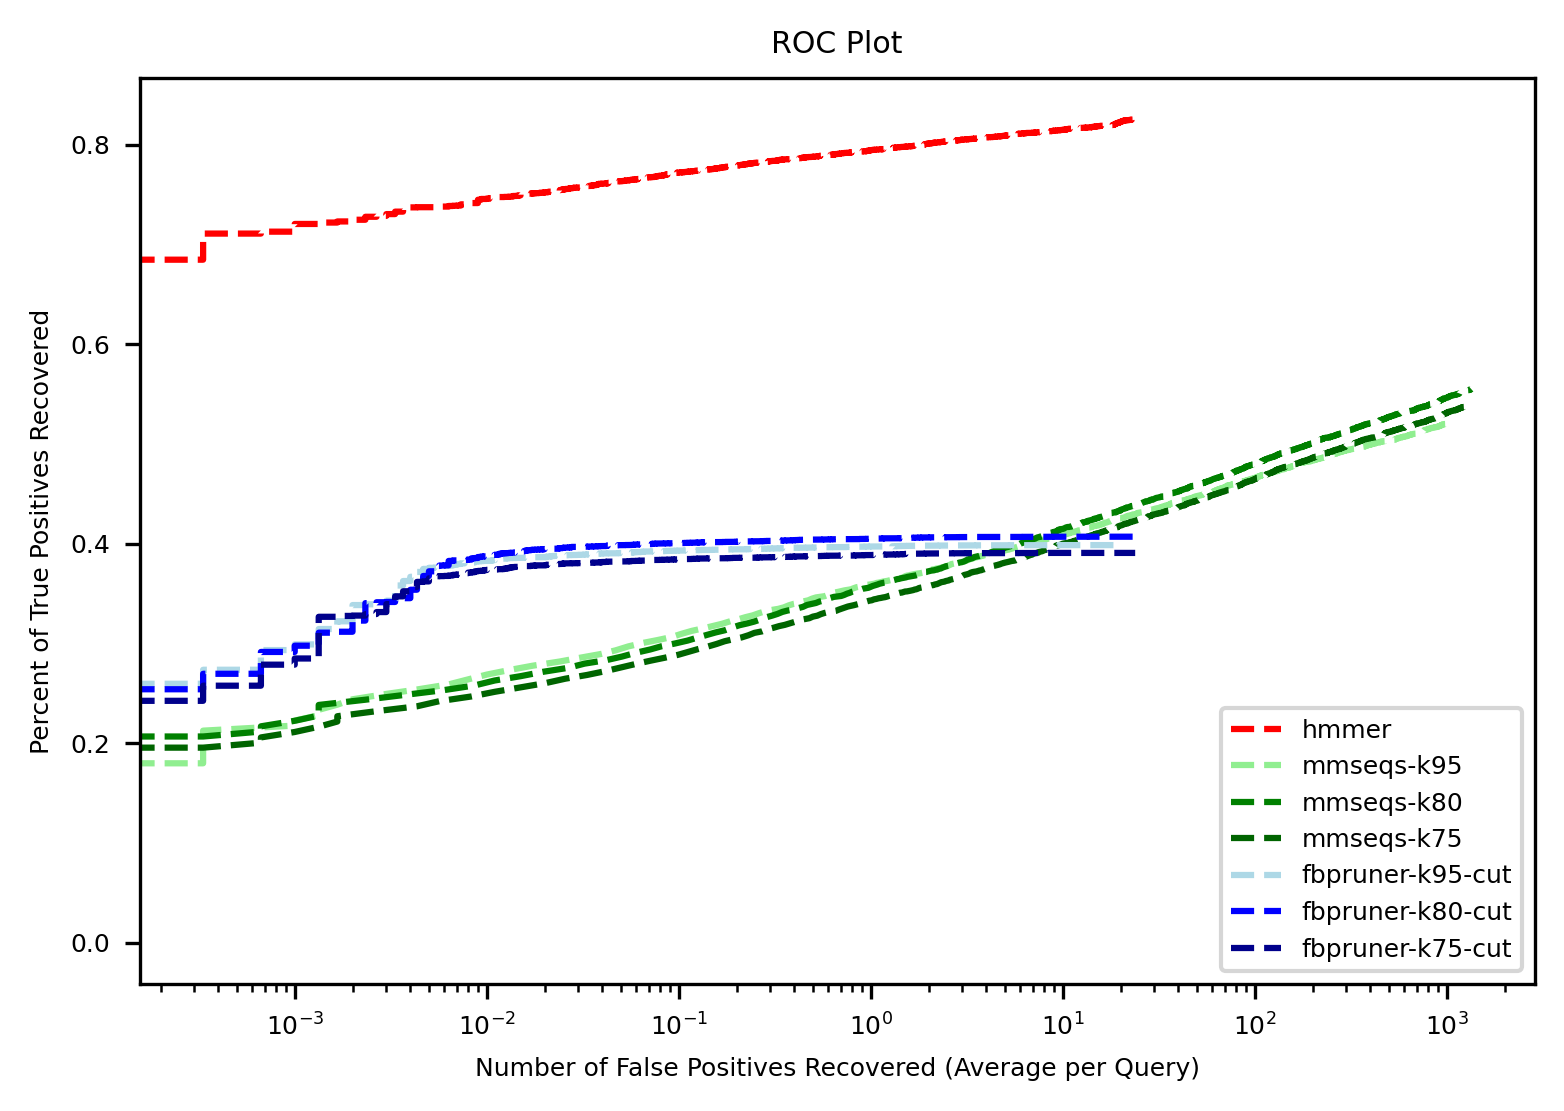

In [171]:
my_data = [ hmmer_data, mmseqs_k95_data, mmseqs_k80_data, mmseqs_k75_data,  fbpruner_k95_cut_data, fbpruner_k80_cut_data, fbpruner_k75_cut_data ]
colors  = [ 'red', 'lightgreen', 'green', 'darkgreen', 'lightblue', 'blue', 'darkblue' ]
labels  = [ 'hmmer', 'mmseqs-k95', 'mmseqs-k80', 'mmseqs-k75', 'fbpruner-k95-cut', 'fbpruner-k80-cut', 'fbpruner-k75-cut' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

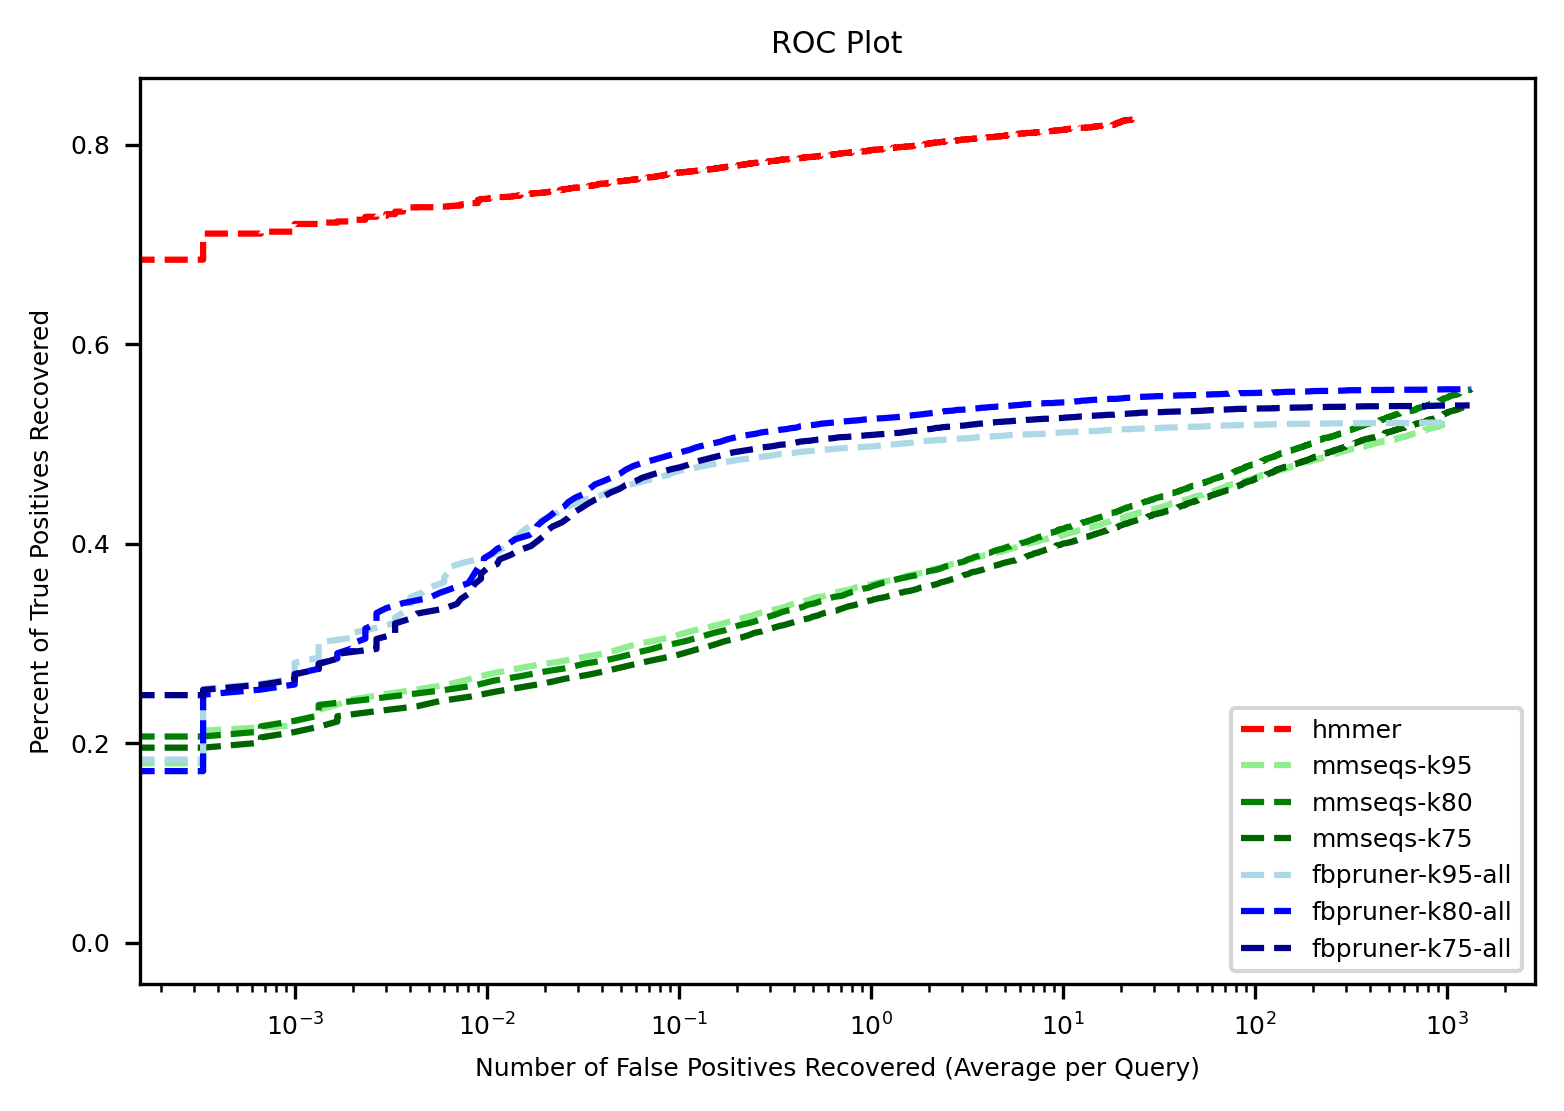

In [201]:
my_data = [ hmmer_data, mmseqs_k95_data, mmseqs_k80_data, mmseqs_k75_data,  fbpruner_k95_all_data, fbpruner_k80_all_data, fbpruner_k75_all_data ]
colors  = [ 'red', 'lightgreen', 'green', 'darkgreen', 'lightblue', 'blue', 'darkblue' ]
labels  = [ 'hmmer', 'mmseqs-k95', 'mmseqs-k80', 'mmseqs-k75', 'fbpruner-k95-all', 'fbpruner-k80-all', 'fbpruner-k75-all' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

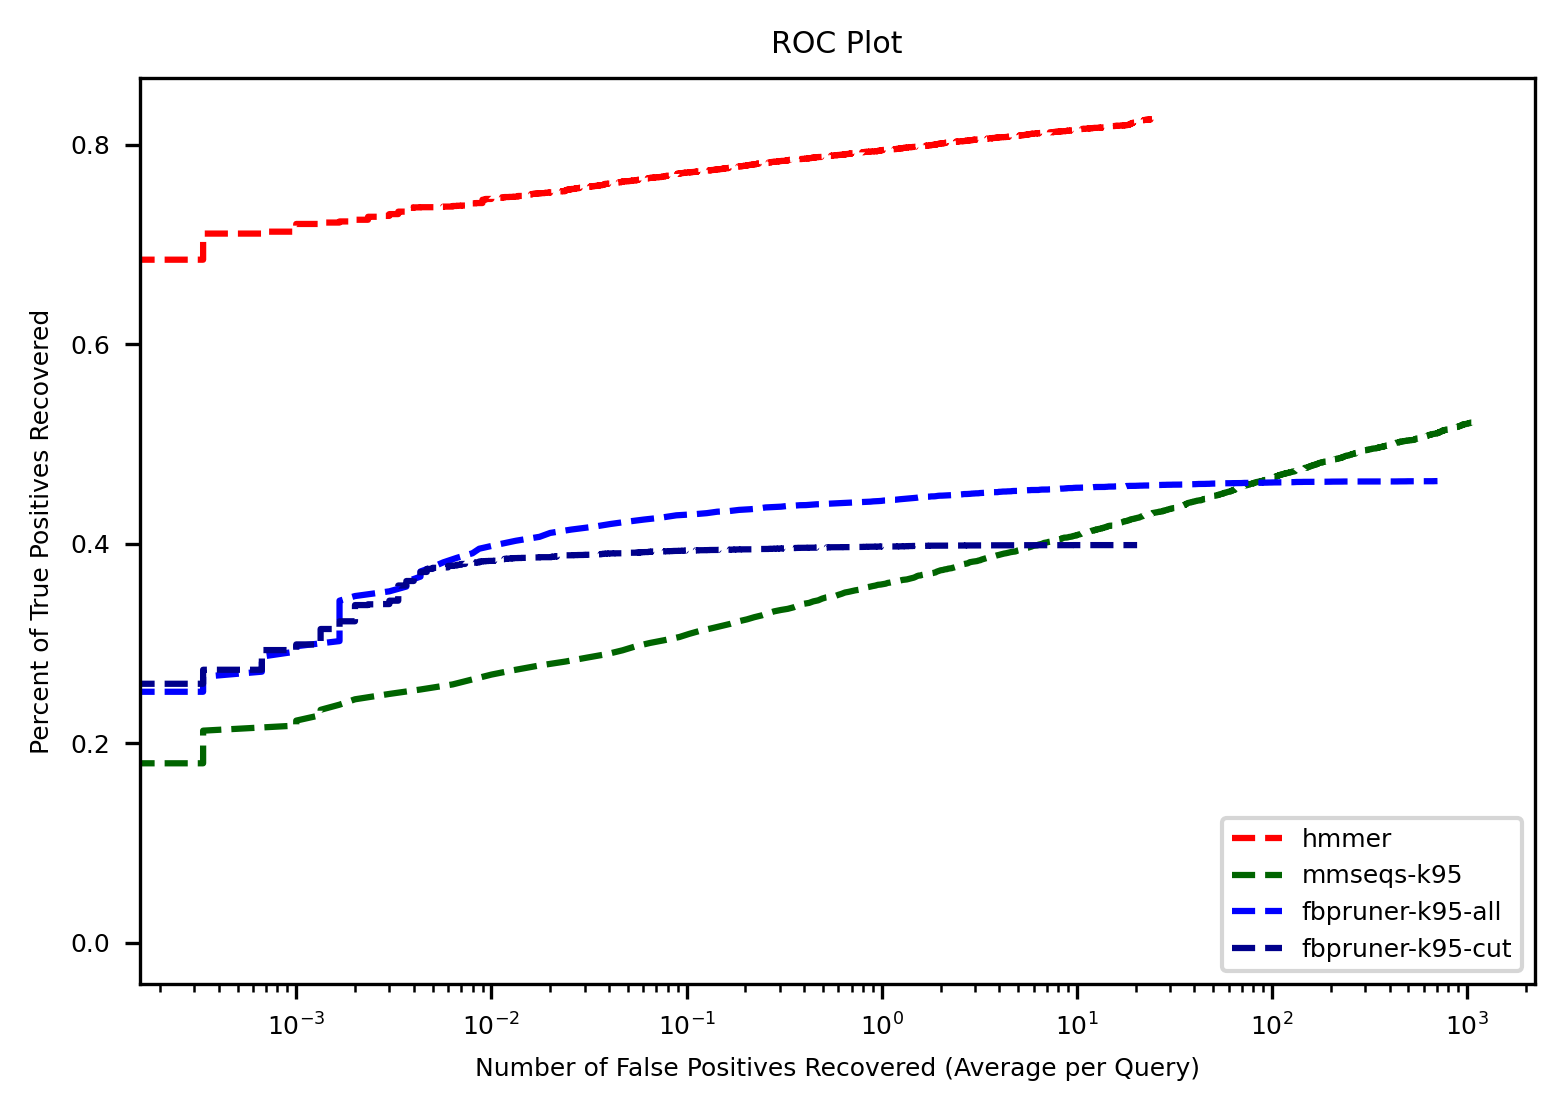

In [172]:
my_data = [ hmmer_data, mmseqs_k95_data, fbpruner_k95_all_data, fbpruner_k95_cut_data ]
colors  = [ 'red', 'darkgreen', 'blue', 'darkblue' ]
labels  = [ 'hmmer', 'mmseqs-k95', 'fbpruner-k95-all', 'fbpruner-k95-cut' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

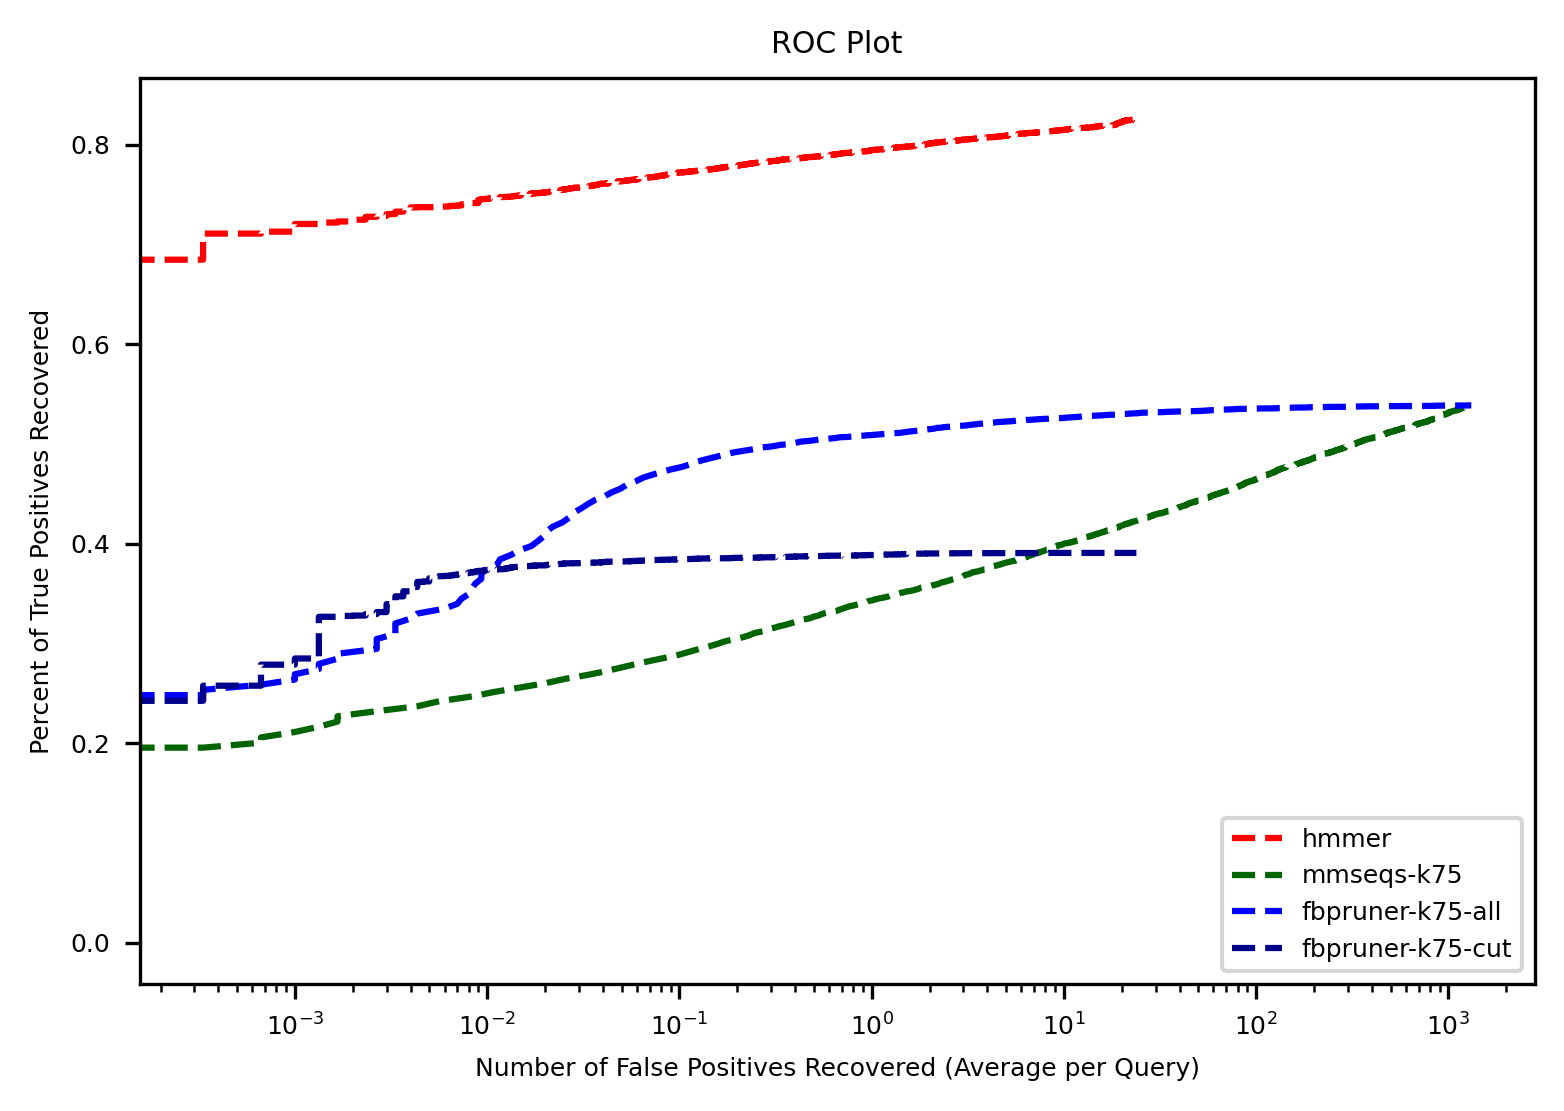

In [178]:
my_data = [ hmmer_data, mmseqs_k75_data, fbpruner_k75_all_data, fbpruner_k75_cut_data ]
colors  = [ 'red', 'darkgreen', 'blue', 'darkblue' ]
labels  = [ 'hmmer', 'mmseqs-k75', 'fbpruner-k75-all', 'fbpruner-k75-cut' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

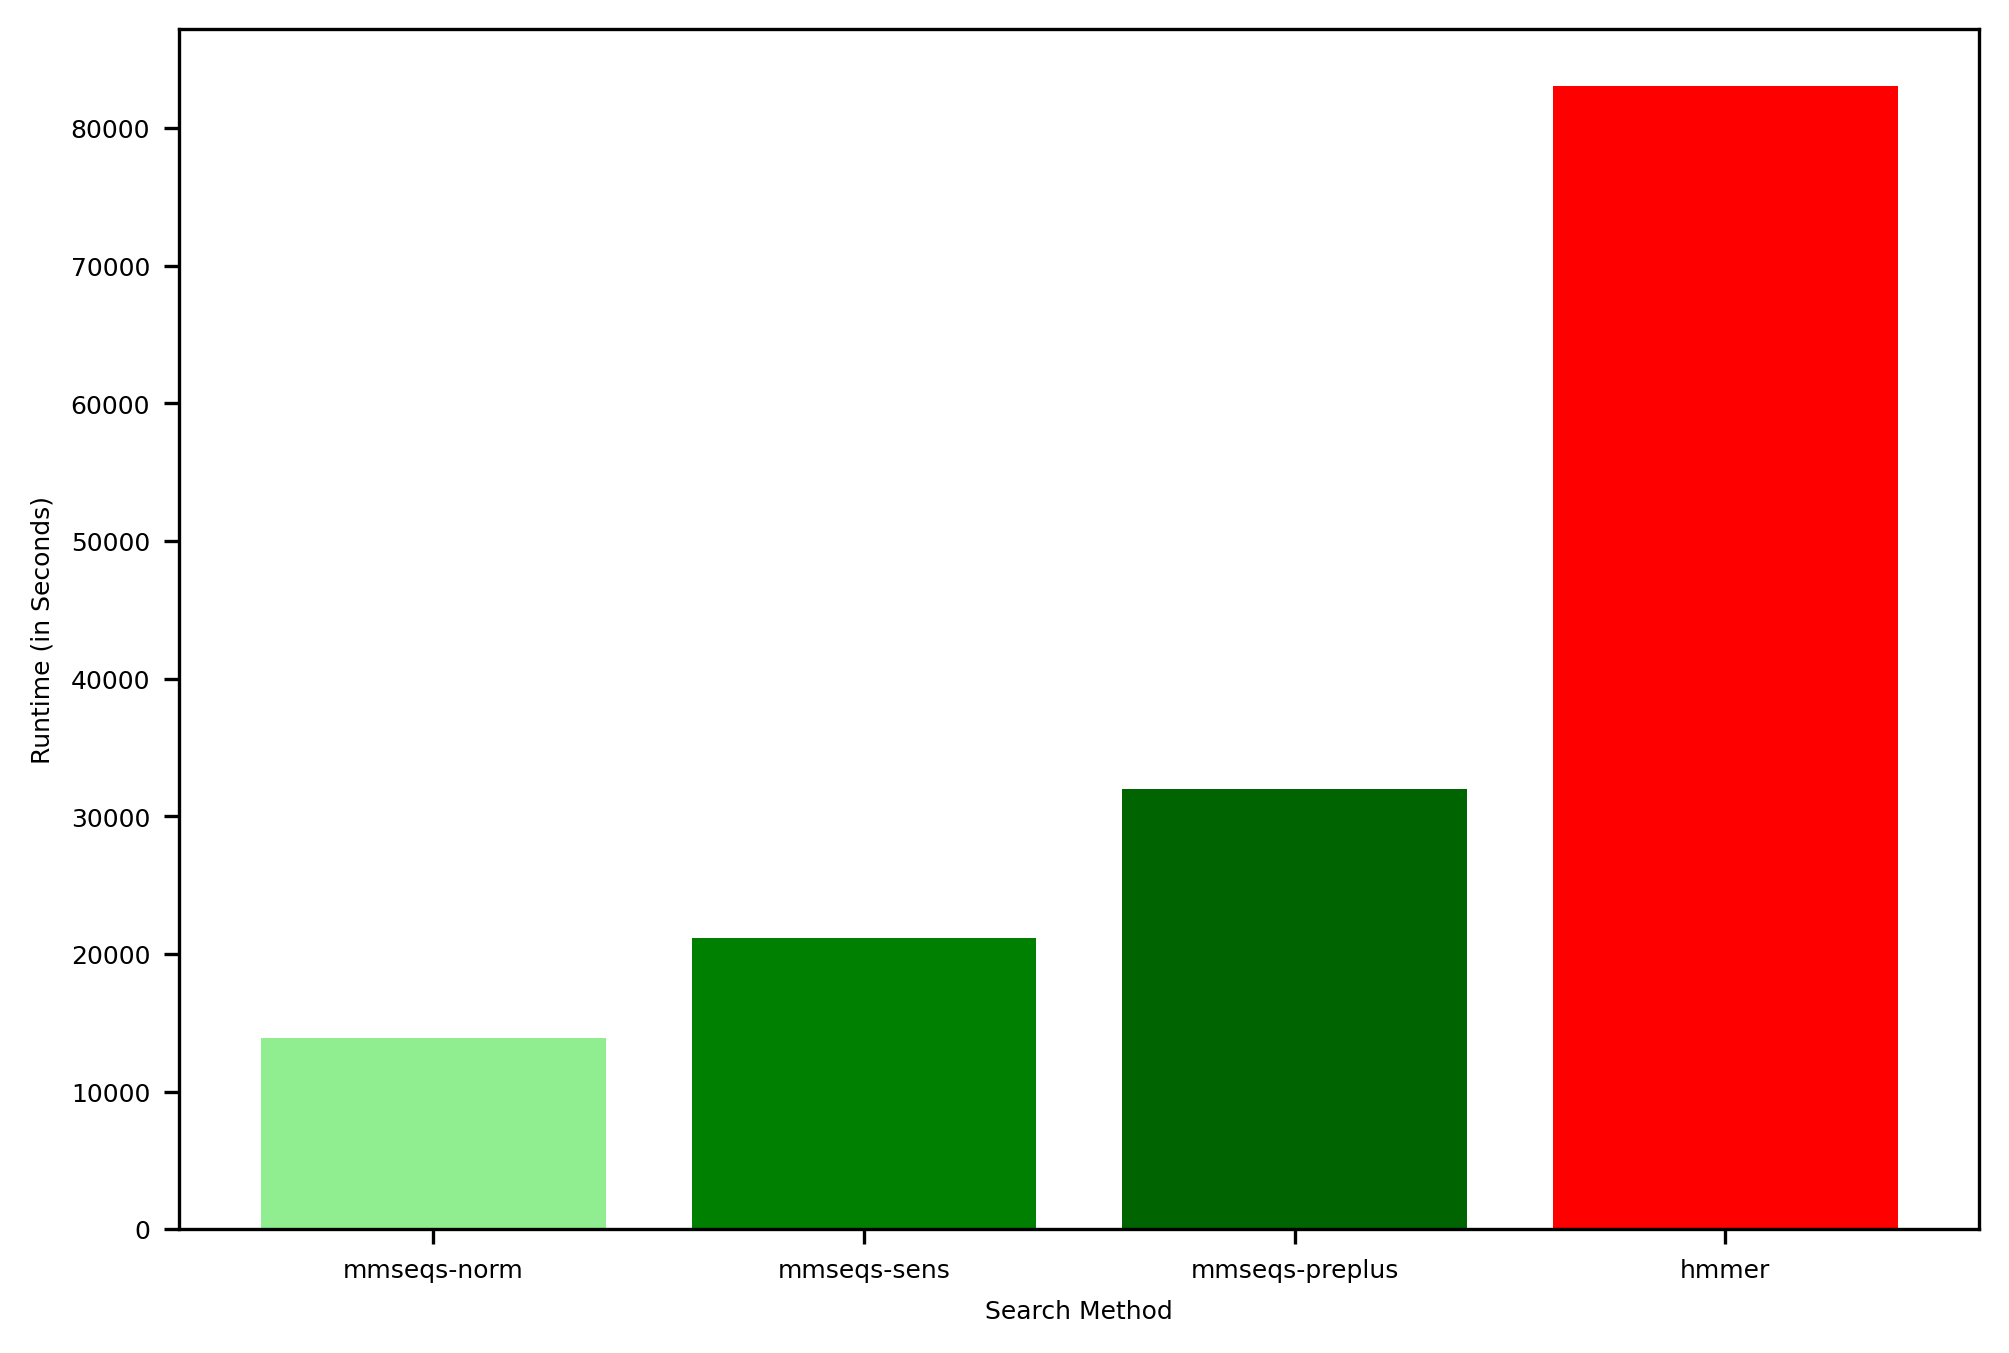

In [173]:
# compare mmseqs sensitivity runtimes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xlabels = ['mmseqs-norm', 'mmseqs-sens', 'mmseqs-preplus', 'hmmer']
colors= ['lightgreen', 'green', 'darkgreen', 'red']
scalar = mmseqs_times['k95']
data = [ mmseqs_times['k95'], mmseqs_times['k80'], mmseqs_times['k75'], hmmer_times['total'] ]
ax.bar(xlabels, data, color=colors)
plt.ylabel('Runtime (in Seconds)')
plt.xlabel('Search Method')
plt.show()

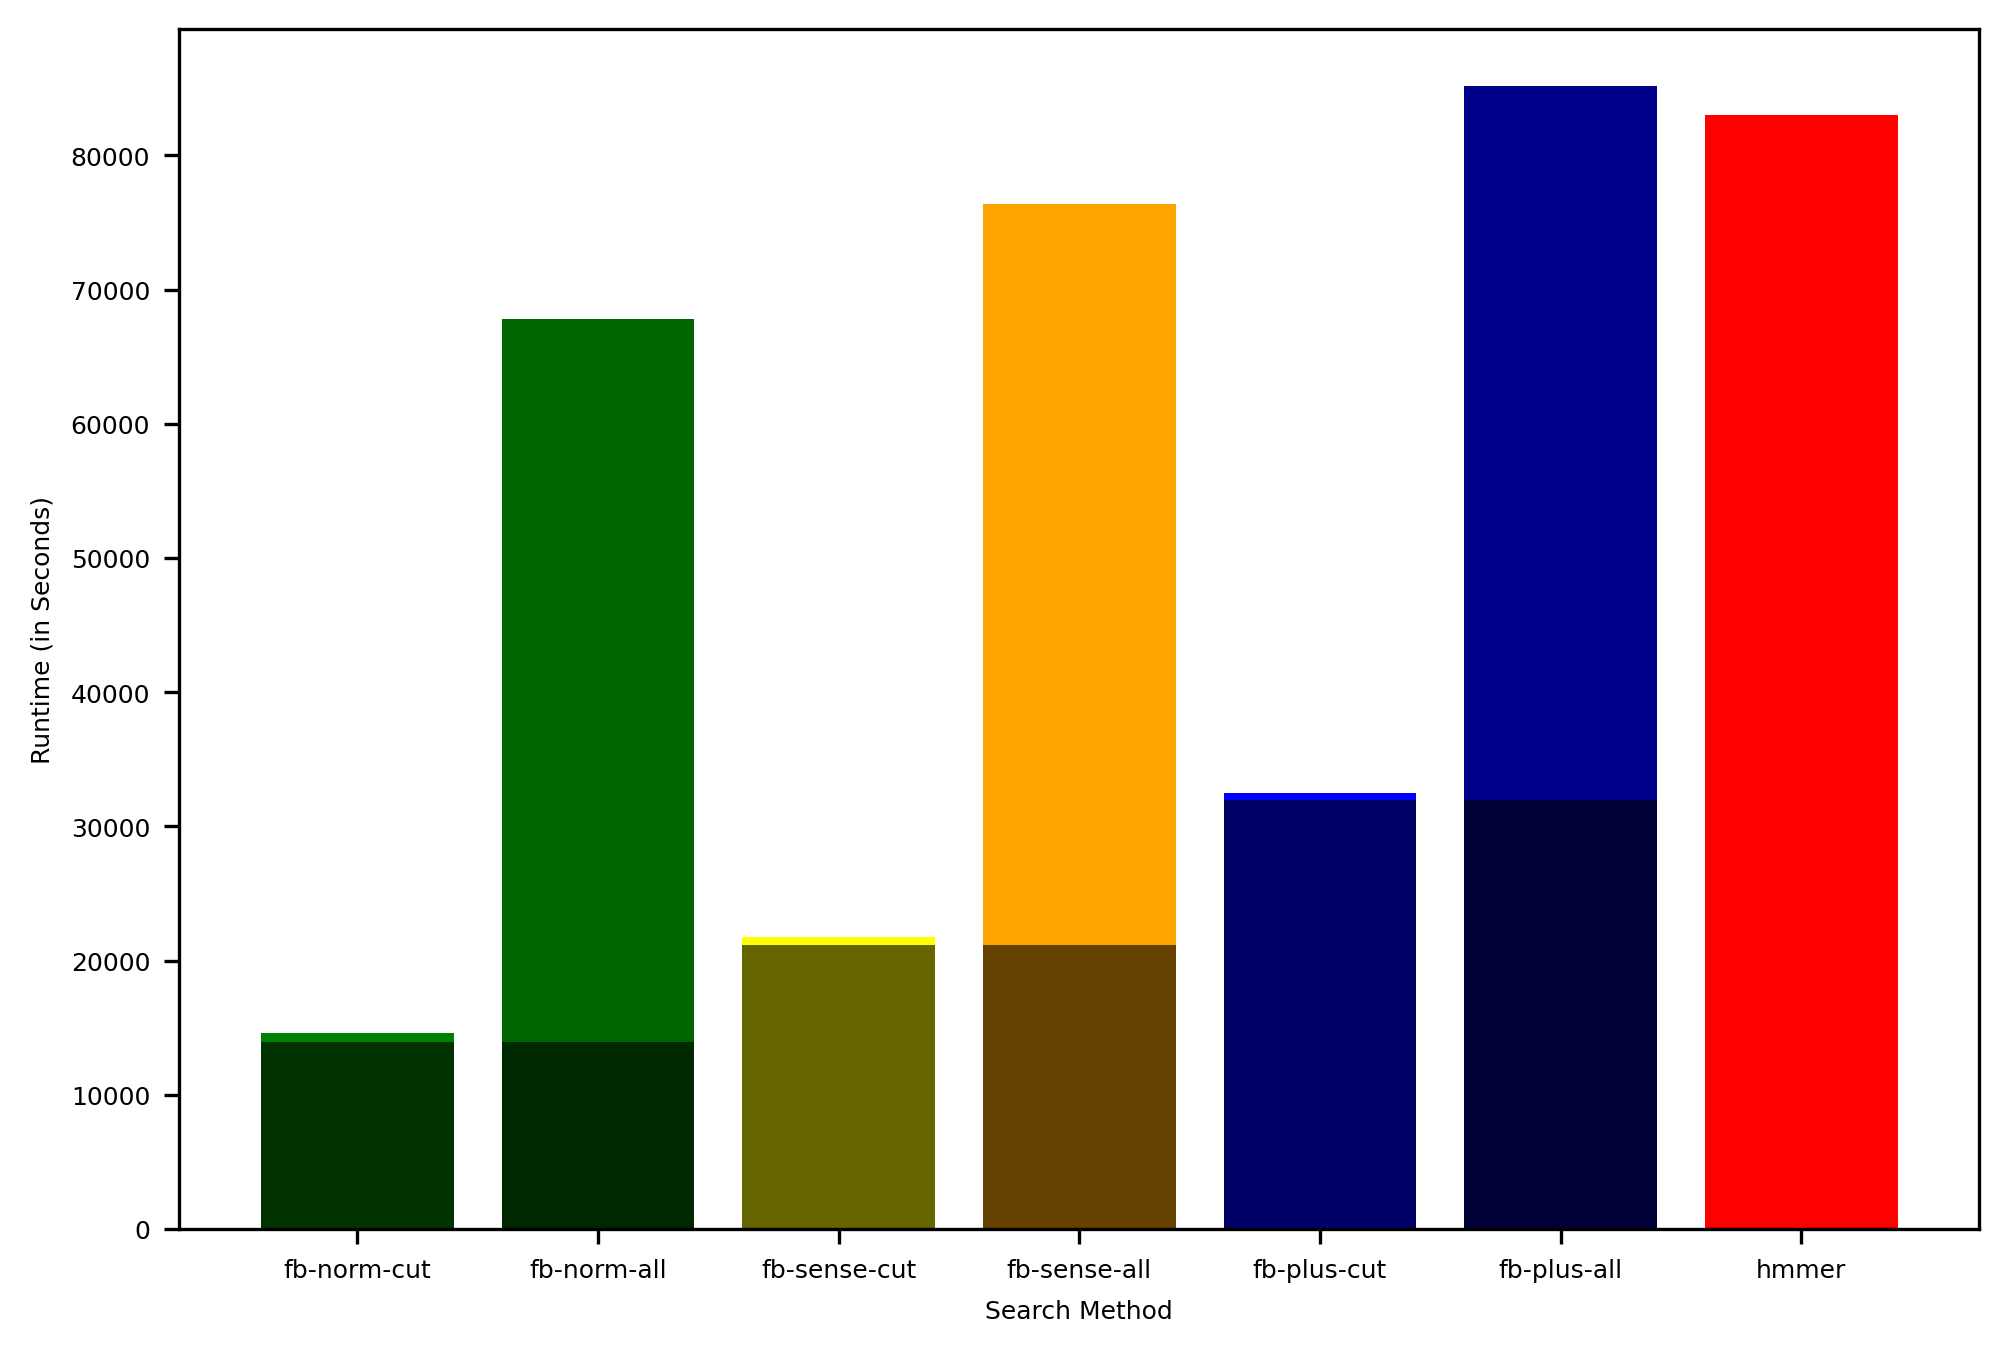

In [177]:
# compare mmseqs sensitivity runtimes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xlabels = ['fb-norm-cut', 'fb-norm-all', 'fb-sense-cut', 'fb-sense-all', 'fb-plus-cut', 'fb-plus-all', 'hmmer']
colors= ['green', 'darkgreen', 'yellow', 'orange', 'blue', 'darkblue', 'red']
scalar = mmseqs_times['k95']
data_top = [ fbpruner_times['k95-cut'], fbpruner_times['k95-all'], fbpruner_times['k80-cut'], fbpruner_times['k80-all'], fbpruner_times['k75-cut'], fbpruner_times['k75-all'], hmmer_times['total'] ]
data_btm = [ mmseqs_times['k95'], mmseqs_times['k95'],  mmseqs_times['k80'], mmseqs_times['k80'], mmseqs_times['k75'], mmseqs_times['k75'], 0 ]
ax.bar(xlabels, data_top, color=colors)
ax.bar(xlabels, data_btm, color='black', alpha=0.6 )
plt.ylabel('Runtime (in Seconds)')
plt.xlabel('Search Method')
plt.show()